# MNIST 손글씨 분류 - Flatten

In [9]:
import tensorflow as tf
import pandas as pd

In [10]:
# MNIST
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()
print(x_train.shape, y_train.shape)
# (60000, 28, 28, 1) (60000,)

# CIFAR-10
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar10.load_data()
print(x_train.shape, y_train.shape)
# (50000, 28, 28, 1) (50000, 1)


(60000, 28, 28) (60000,)
(50000, 32, 32, 3) (50000, 1)


In [12]:
# 데이터 준비
(x_train, y_train), (x_test, y_test)= tf.keras.datasets.mnist.load_data()
print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)

x_train = x_train.reshape(60000, 28 * 28)
x_test = x_test.reshape(10000, 28 * 28)
y_train = pd.get_dummies(y_train)
y_test = pd.get_dummies(y_test)

print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)

# 모델 생성
X = tf.keras.Input(shape=[28 * 28])
H = tf.keras.layers.Flatten()(X)
H = tf.keras.layers.Dense(84, activation="swish")(H)
Y = tf.keras.layers.Dense(10, activation="softmax")(H)
model = tf.keras.Model(X, Y)
model.compile(loss="categorical_crossentropy", metrics="accuracy")
model.summary()

# 모델 학습
model.fit(x_train, y_train, epochs=10, validation_split=0.1, batch_size=128)

(60000, 28, 28) (60000,)
(10000, 28, 28) (10000,)
(60000, 784) (60000, 10)
(10000, 784) (10000, 10)
Model: "model_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_4 (InputLayer)        [(None, 784)]             0         
                                                                 
 flatten_2 (Flatten)         (None, 784)               0         
                                                                 
 dense_6 (Dense)             (None, 84)                65940     
                                                                 
 dense_7 (Dense)             (None, 10)                850       
                                                                 
Total params: 66790 (260.90 KB)
Trainable params: 66790 (260.90 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/10
422/422 [==============================] -

In [13]:
# 모델 평가
model.evaluate(x_test, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.3615 - accuracy: 0.9533


[0.3614608347415924, 0.9532999992370605]

      0  1  2  3  4  5  6  7  8  9
9538  0  0  0  0  1  0  0  0  0  0
1/1 [==============================] - 0s 62ms/step
[[7.4501782e-15 4.2382955e-10 2.3427417e-12 8.9700143e-16 5.2363563e-01
  1.6176422e-09 2.3396253e-19 1.1574499e-03 1.3283835e-02 4.6192306e-01]]


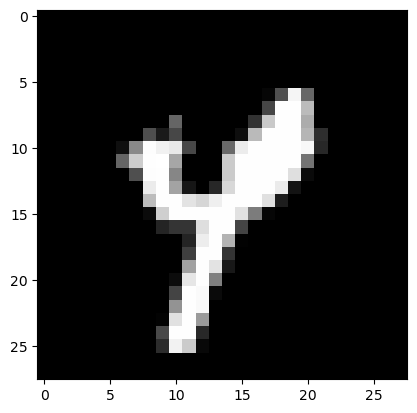

In [14]:
# 모델 이용
import matplotlib.pyplot as plt

num = 9538
print(y_test[num:num+1])
print(model.predict(x_test[num:num+1]))

plt.imshow(x_test[num].reshape(28, 28), cmap="gray")
plt.show()